# EDA analysis of the datasets.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


In [4]:
# Load the dataset (adjust the path as needed)
df = pd.read_csv("../data/Fraud_Data.csv")
df.head()


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


## Basic Info

In [5]:
print("Shape:", df.shape)
df.info()
df.describe(include='all')


Shape: (151112, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
count,151112.000000,151112,151112,151112.000000,151112,151112,151112,151112,151112.000000,1.511120e+05,151112.000000
unique,NaN,151112,150679,NaN,137956,3,5,2,NaN,NaN,NaN
top,NaN,2015-02-24 22:55:49,2015-07-17 23:22:55,NaN,ITUMJCKWEYNDD,SEO,Chrome,M,NaN,NaN,NaN
freq,NaN,1,3,NaN,20,60615,61432,88293,NaN,NaN,NaN
mean,200171.040970,NaN,NaN,36.935372,NaN,NaN,NaN,NaN,33.140704,2.152145e+09,0.093646
std,115369.285024,NaN,NaN,18.322762,NaN,NaN,NaN,NaN,8.617733,1.248497e+09,0.291336
min,2.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,18.000000,5.209350e+04,0.000000
25%,100642.500000,NaN,NaN,22.000000,NaN,NaN,NaN,NaN,27.000000,1.085934e+09,0.000000
50%,199958.000000,NaN,NaN,35.000000,NaN,NaN,NaN,NaN,33.000000,2.154770e+09,0.000000
75%,300054.000000,NaN,NaN,49.000000,NaN,NaN,NaN,NaN,39.000000,3.243258e+09,0.000000


## Missing Values and Duplicates

In [6]:
# Check for missing values
df.isnull().sum()

# Check for duplicates
print("Duplicates:", df.duplicated().sum())


Duplicates: 0


## Convert Timestamp Columns

In [7]:
df['signup_time'] = pd.to_datetime(df['signup_time'])
df['purchase_time'] = pd.to_datetime(df['purchase_time'])


## Target Variable Distribution

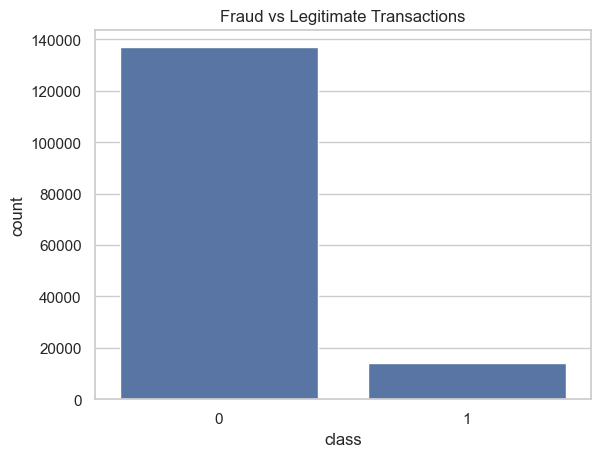

class
0    0.906354
1    0.093646
Name: proportion, dtype: float64


In [8]:
sns.countplot(x='class', data=df)
plt.title('Fraud vs Legitimate Transactions')
plt.show()

print(df['class'].value_counts(normalize=True))


## Univariate Analysis

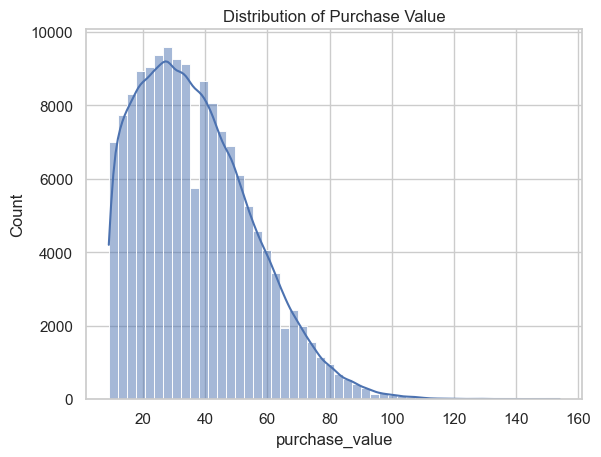

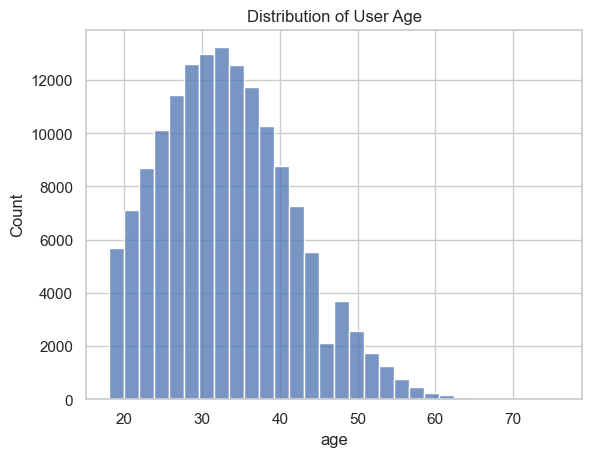

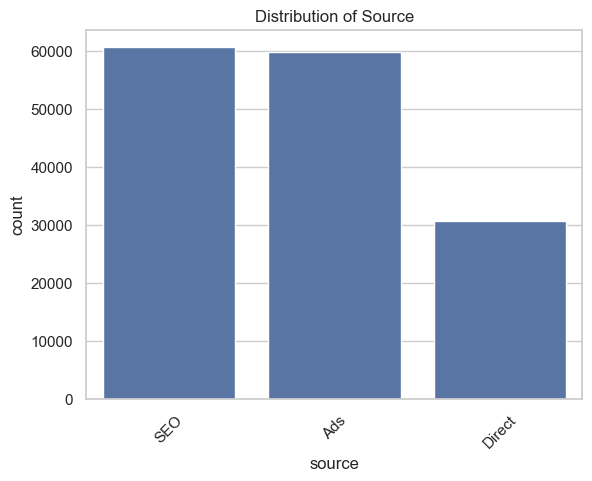

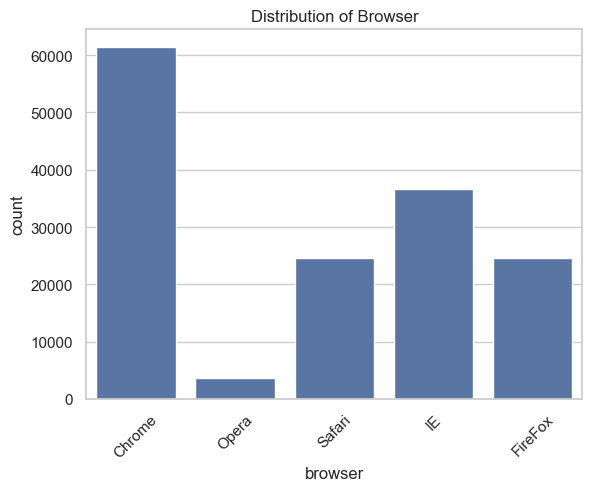

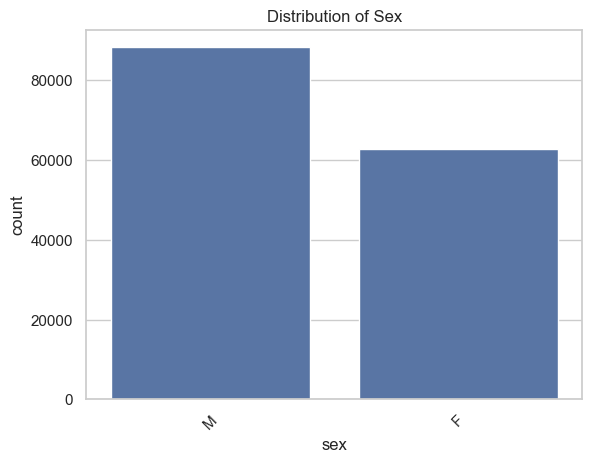

In [9]:
# Purchase value
sns.histplot(df['purchase_value'], bins=50, kde=True)
plt.title('Distribution of Purchase Value')
plt.show()

# Age
sns.histplot(df['age'], bins=30)
plt.title('Distribution of User Age')
plt.show()

# Source and Browser
for col in ['source', 'browser', 'sex']:
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col.capitalize()}')
    plt.xticks(rotation=45)
    plt.show()


## Bivariate Analysis: Fraud vs Legit

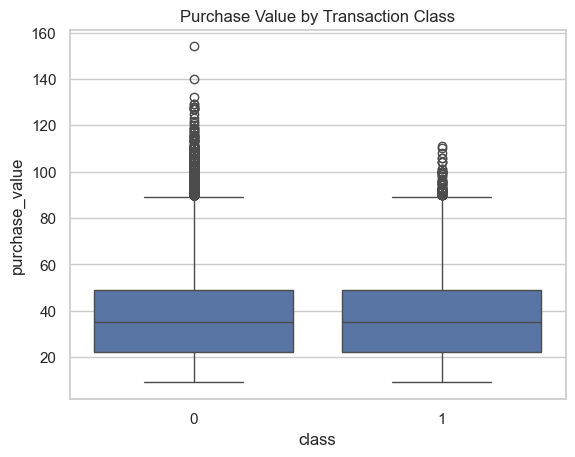

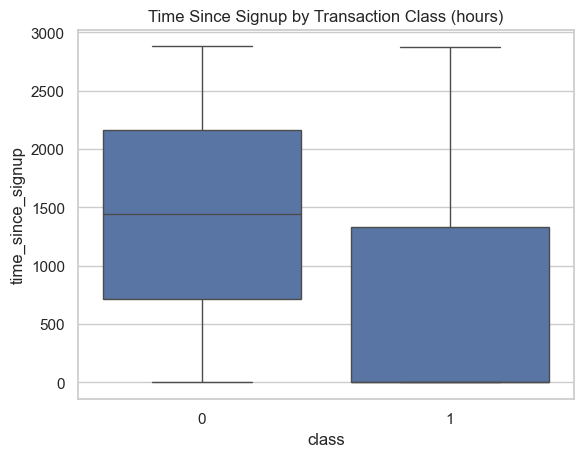

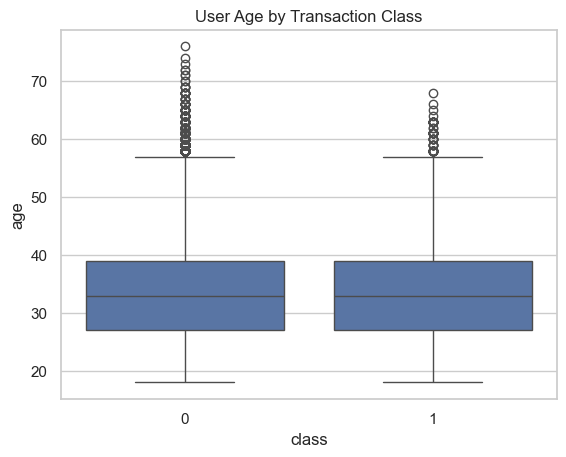

In [10]:
# Purchase value by class
sns.boxplot(x='class', y='purchase_value', data=df)
plt.title('Purchase Value by Transaction Class')
plt.show()

# Time difference between signup and purchase
df['time_since_signup'] = (df['purchase_time'] - df['signup_time']).dt.total_seconds() / 3600

sns.boxplot(x='class', y='time_since_signup', data=df)
plt.title('Time Since Signup by Transaction Class (hours)')
plt.show()

# Age vs Class
sns.boxplot(x='class', y='age', data=df)
plt.title('User Age by Transaction Class')
plt.show()


In [11]:
df.to_csv("../data/processed_fraud_data.csv", index=False)